In [43]:
import random
import math
import pylab as pl
import numpy as np
from matplotlib.colors import ListedColormap
from collections import Counter
import matplotlib.pyplot as plt


def what_cell(x, x_min, x_max, n_cell):
        cell = int((x - x_min) * n_cell / (x_max - x_min))
        if cell == n_cell:
            cell = cell - 1
        return cell

class kNN4():    
    
    def dist (a, b):
        return np.sqrt((a[0] - b[0])**2 + (a[1] - b[1])**2)
    
    def _gen(n, x_start, y_start): #tested
        direcs = [(0, -1), (-1, 0), (0, 1), (1, 0)]
        yy = np.array([x_start, y_start])
        direc = 2
        yield yy
        d = 1
        while d <= n:
            for t in range(2):
                for dd in range(d):
                    for k in range(2):
                        if dd == d - 1 and d == n:
                            return 
                        yy[k] += direcs[direc][k]
                        yield yy
                direc = (direc + 1) % len(direcs)
            d += 1
    
    def __init__(self, K = 1, n_cell = 4):
        self.K = K
        self.n_cell = n_cell
        self._cells = None
        self._example = None
        self._groups = None
        self._mins = None
        self._maxs = None
        self.test = None
        self.groups = None
        self.cens = None
    
    def train(self, M = None, groups = None):
        if M.shape[0] == 0 or groups.shape[0] == 0:
            raise Exception("No data#\n")
        n_dots = M.shape[0]
        self._groups = groups
        cells = np.zeros(n_dots * 2).reshape(n_dots, 2)
        mins = np.array([M[:, 0].min(), M[:, 1].min()])
        maxs = np.array([M[:, 0].max(), M[:, 1].max()])
        lens = maxs - mins
        for i in range(n_dots):
            for j in range(2):
                cells[i][j] = what_cell(M[i][j], mins[j], maxs[j], self.n_cell)
        self._example = M
        self._cells = cells
        self._mins = mins
        self._maxs = maxs
        
    def test(self, test = None):
        if test == None:
            raise Exception("No data#\n")
        n_dots = test.shape[0]
        groups_test = np.zeros(n_dots)
        for i in range(n_dots):
            cell = np.zeros(2)
            for j in range(2):
                cell[j] = what_cell(test[i][j], self.mins[j], self.maxs[j], self.n_cell)
            fil = None
            for this_cell in _gen(self.n_cell // 2, cell[0], cell[1]):
                fil = np.concatenate(fil, np.arange(self.n_cell)[(cells[:][0] == cell[0]) & (cells[:][1] == cell[j])])
                if fil.shape[0] >= self.K:
                    break
            groups_test[i] = Counter(self.groups[fil]).most_common(1)[0][0]
        self.groups = groups_test
        self.test = test
    
    def current_mood(self):
        print("K =", self.K)
        print("n_cell =", self.n_cell)
        print("cells =", self._cells)
        print("example =", self._example)
        print("_groups =", self._groups)
        print("_mins =", self._mins)
        print("_maxs =", self._maxs)
        print("test =", self.test)
        print("groups = ", self.groups)
    
    def centers_of_cells(self):
        if self.cens.shape[0] == 0:
            ceters = np.array()
            for i in range(self.n_cell):
                for j in range(self.n_cell):
                    plt.scatter(self._mins[0] + (i * (self._maxs[0] - self._mins[0]) / 2 * self.n_cell), 
                                self._mins[1] + (j * (self._maxs[1] - self._mins[1]) / 2 * self.n_cell))


K = 2
n_cell = 4
cells = [[0. 0.]
 [2. 2.]
 [3. 3.]]
example = [[1 2]
 [2 3]
 [3 4]]
_groups = [1 2 3]
_mins = [1 2]
_maxs = [3 4]
test = None
groups =  None


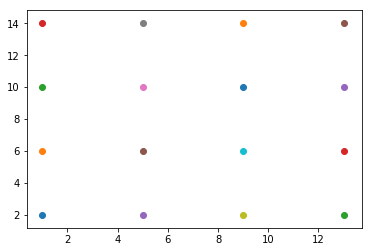

In [44]:
M = np.array([[1, 2],[2, 3],[3, 4]])
groups = np.array([1, 2, 3])
knn = kNN4(2, 4)
knn.train(M, groups)
knn.current_mood()
knn.centers_of_cells()